In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
circa_db = pd.read_excel('downloads/aat8806_Data_file_S1.xlsx', sheet_name = 0)

In [3]:
circa_drug_tar = np.loadtxt('downloads/HumCircMed2018v2_target.txt', dtype = 'int')

In [4]:
def find_value_bin_frequency(values,hist_lists):
    value_freq = []
    for v in values:
        v_id = np.max(np.where(hist_lists[1] <= v))
        if v_id == len(hist_lists[1])-1:
            v_id = v_id - 1
        value_freq.append(hist_lists[0][v_id])
    value_freq = np.array(value_freq)
    return value_freq

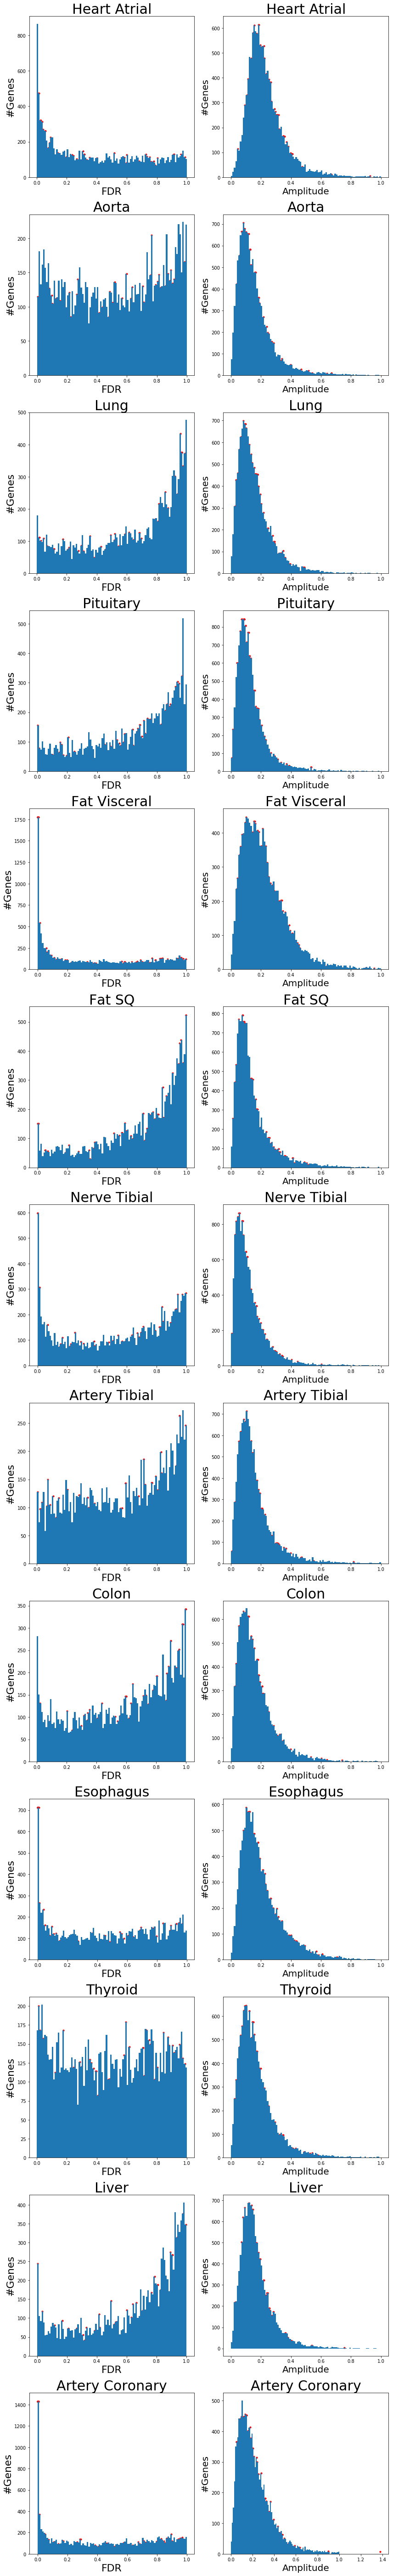

In [5]:
# plot the distribution of scores in each tissue
unique_tissues = set(circa_db.loc[:,'tissue'])
tissue_len = len(unique_tissues)

amp_min = min(circa_db.loc[:,'rAmp'])
amp_max = max(circa_db.loc[:,'rAmp'])

plt.figure(figsize = (12,tissue_len*6))

for i,ti in enumerate(unique_tissues):
    tissue_id = circa_db.index[circa_db['tissue'] == ti]
    tissue_fdr = circa_db.iloc[tissue_id,4]
    tissue_amp = circa_db.iloc[tissue_id,6]
    tissue_gene = circa_db.iloc[tissue_id,2]
    
    circa_drug_tar_fdr = []
    circa_drug_tar_amp = []
    for tar in circa_drug_tar:
        tar_id = tissue_gene.index[tissue_gene == tar]
        if len(tar_id) > 0:
            tar_fdr = float(tissue_fdr[tar_id])
            tar_amp = float(tissue_amp[tar_id])
            circa_drug_tar_fdr.append(tar_fdr)
            circa_drug_tar_amp.append(tar_amp) 
    
    ax = plt.subplot(tissue_len, 2, 2*i+1)
    axh = ax.hist(tissue_fdr, bins = 100, range = (0,1))
    
    circa_drug_tar_fdr = np.array(circa_drug_tar_fdr)
    circa_drug_tar_fdr_freq = find_value_bin_frequency(circa_drug_tar_fdr,axh)
    ax.scatter(circa_drug_tar_fdr, circa_drug_tar_fdr_freq, color = 'red', s = 10)
    
    ax.set_title(ti, size = 30)
    ax.set_xlabel('FDR', size = 22)
    ax.set_ylabel('#Genes', size= 22)

    ax = plt.subplot(tissue_len, 2, 2*i+2)
    axh = ax.hist(tissue_amp, bins = 100, range = (0,1))
    
    circa_drug_tar_amp = np.array(circa_drug_tar_amp)
    circa_drug_tar_amp_freq = find_value_bin_frequency(circa_drug_tar_amp,axh)
    ax.scatter(circa_drug_tar_amp, circa_drug_tar_amp_freq, color = 'red', s = 10)
    
    ax.set_title(ti, size = 30)
    ax.set_xlabel('Amplitude', size = 20)
    ax.set_ylabel('#Genes', size= 20)

plt.tight_layout()
plt.savefig('plot/circa_db_tissue_scores.pdf')

In [80]:
unique_genes = set(circa_db.loc[:,'Entrez.ID'])

gene_fdr_list = []
gene_amp_list = []

for gene in unique_genes:
    gene_id = circa_db.index[circa_db['Entrez.ID'] == gene]
    if len(gene_id) == tissue_len:
        gene_fdr = np.array(circa_db.iloc[gene_id,4])
        gene_amp = np.array(circa_db.iloc[gene_id,6])
        sig_id = (gene_fdr < 0.05) * (gene_amp > 0.33) 
        sig_len = len(np.where(sig_id > 0)[0])
        if sig_len > 0.5*tissue_len:
            gene_fdr_list.append(gene_fdr)
            gene_amp_list.append(gene_amp)

In [81]:
column_names = circa_db['tissue'].unique().tolist()
gene_fdr_list = pd.DataFrame(gene_fdr_list,columns = column_names)
gene_amp_list = pd.DataFrame(gene_amp_list,columns = column_names)

<Figure size 5616x5616 with 0 Axes>

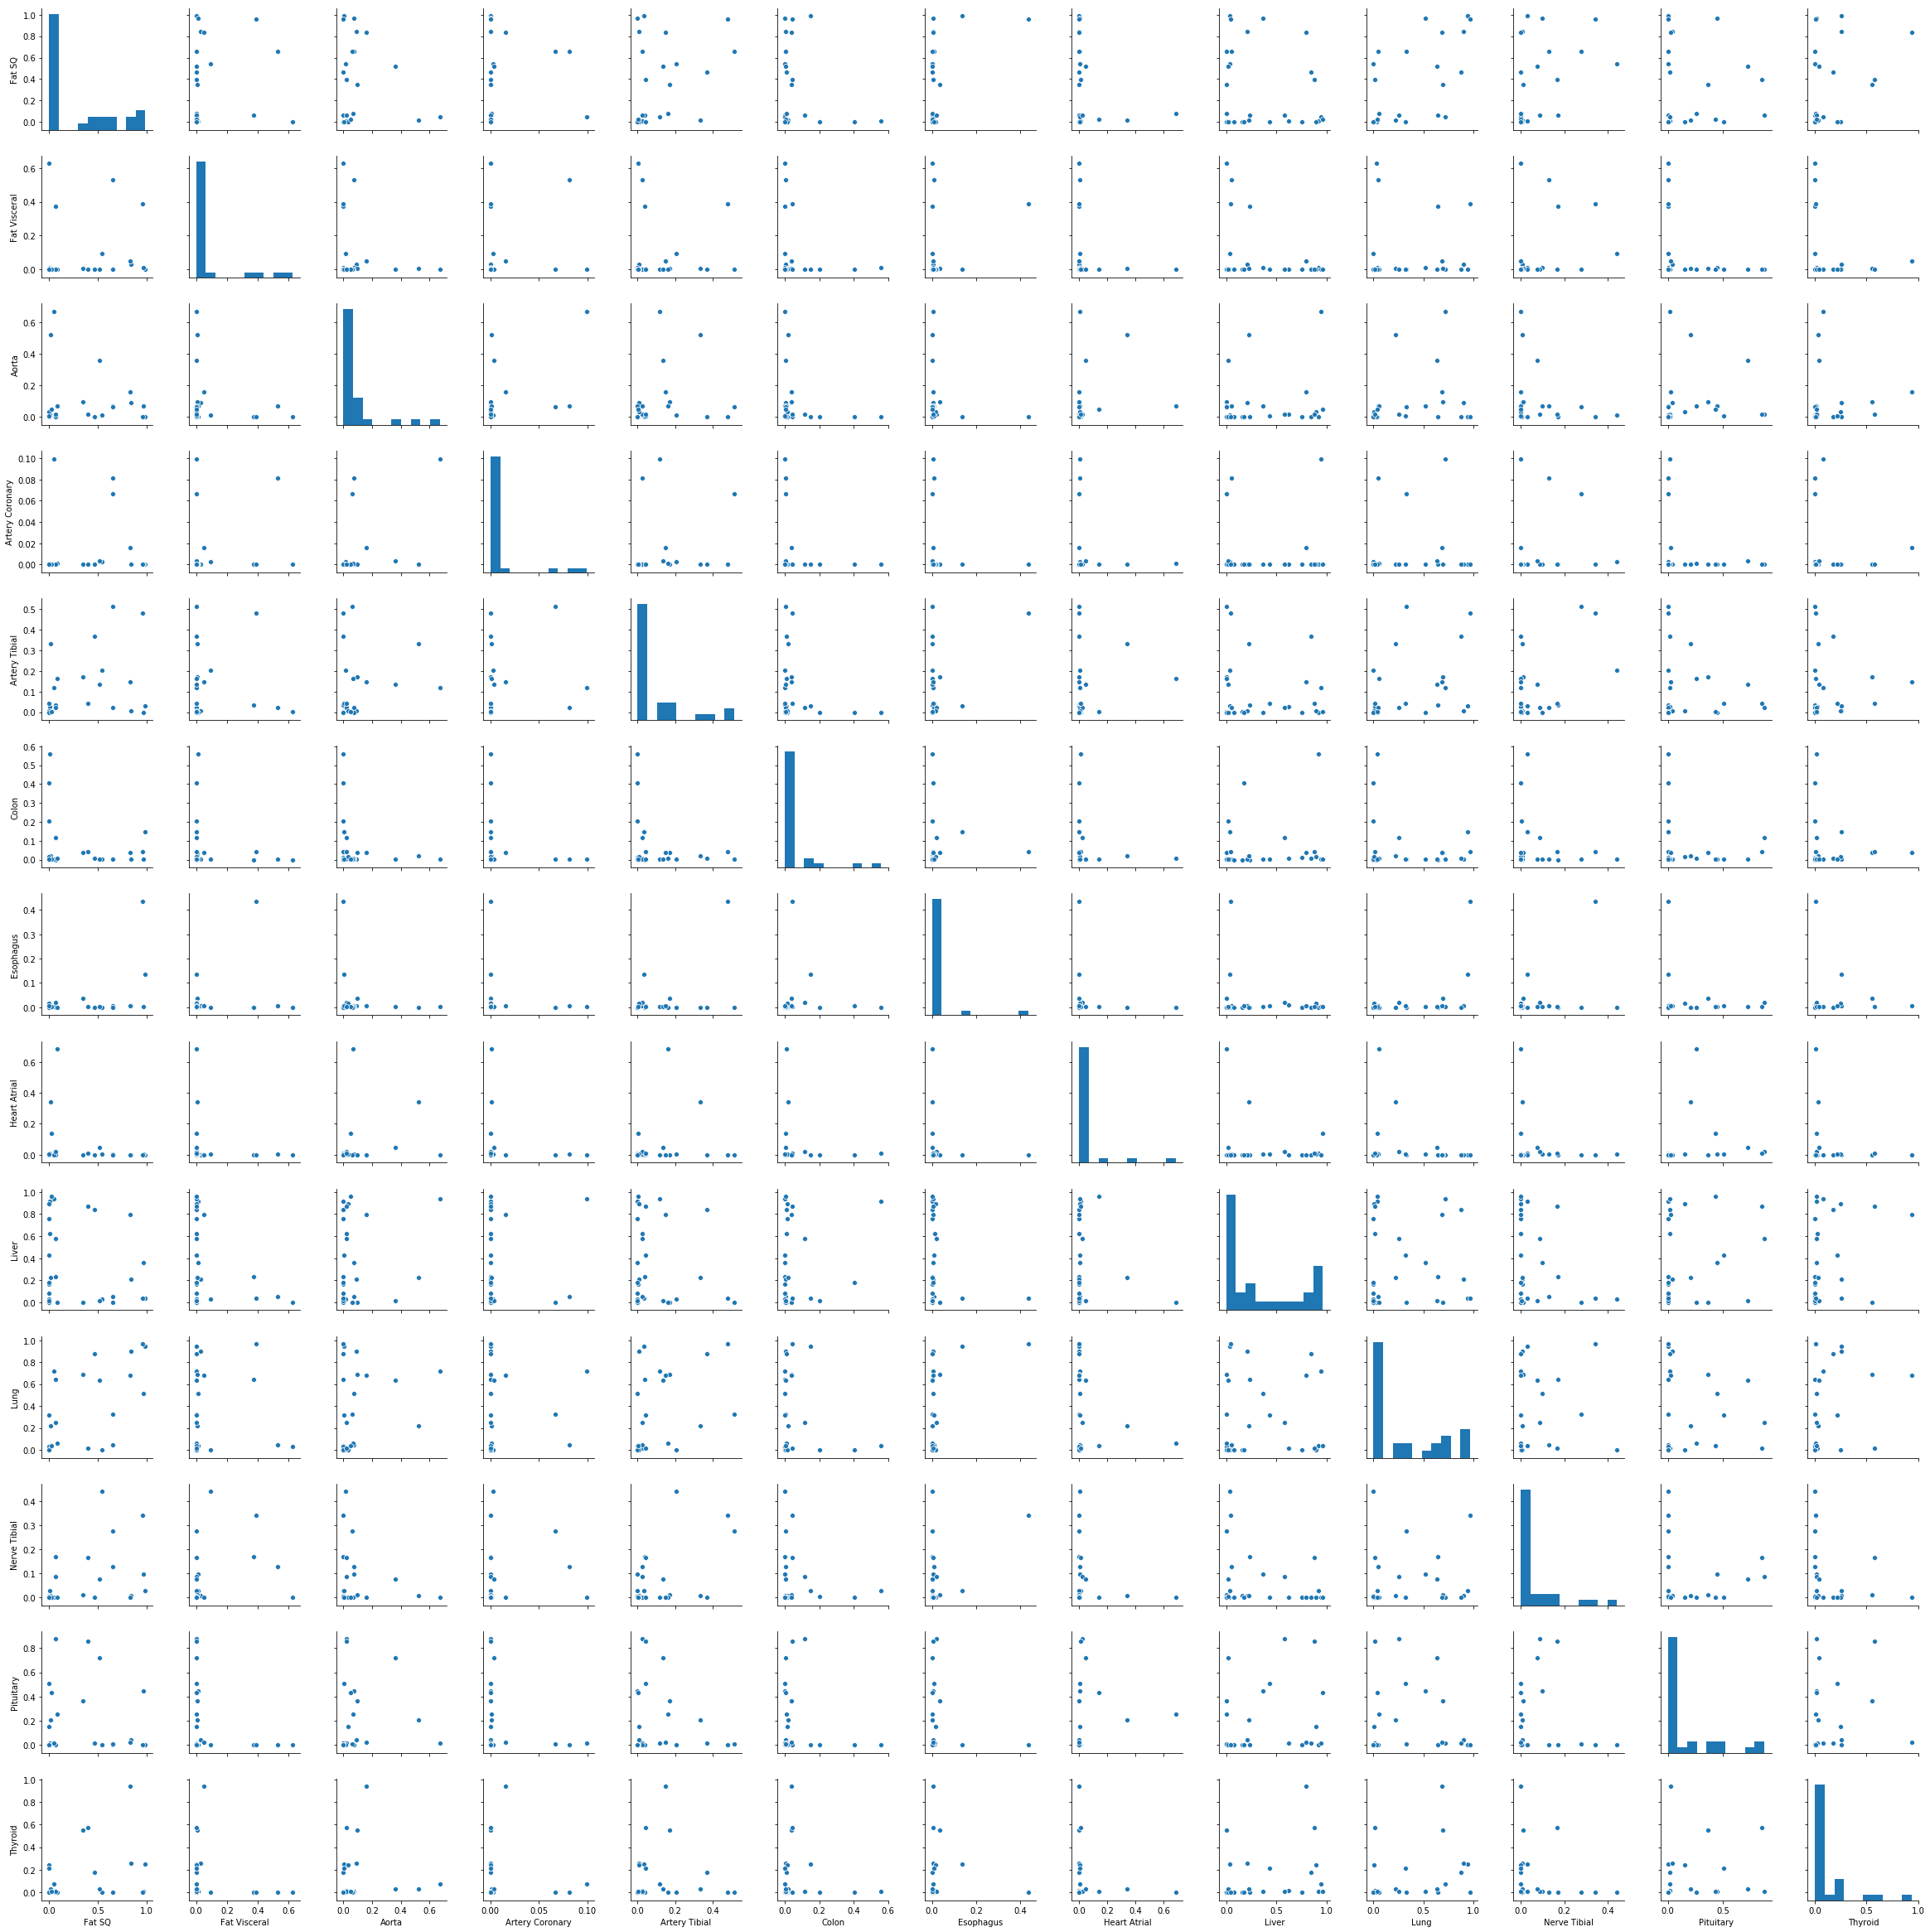

<Figure size 5616x5616 with 0 Axes>

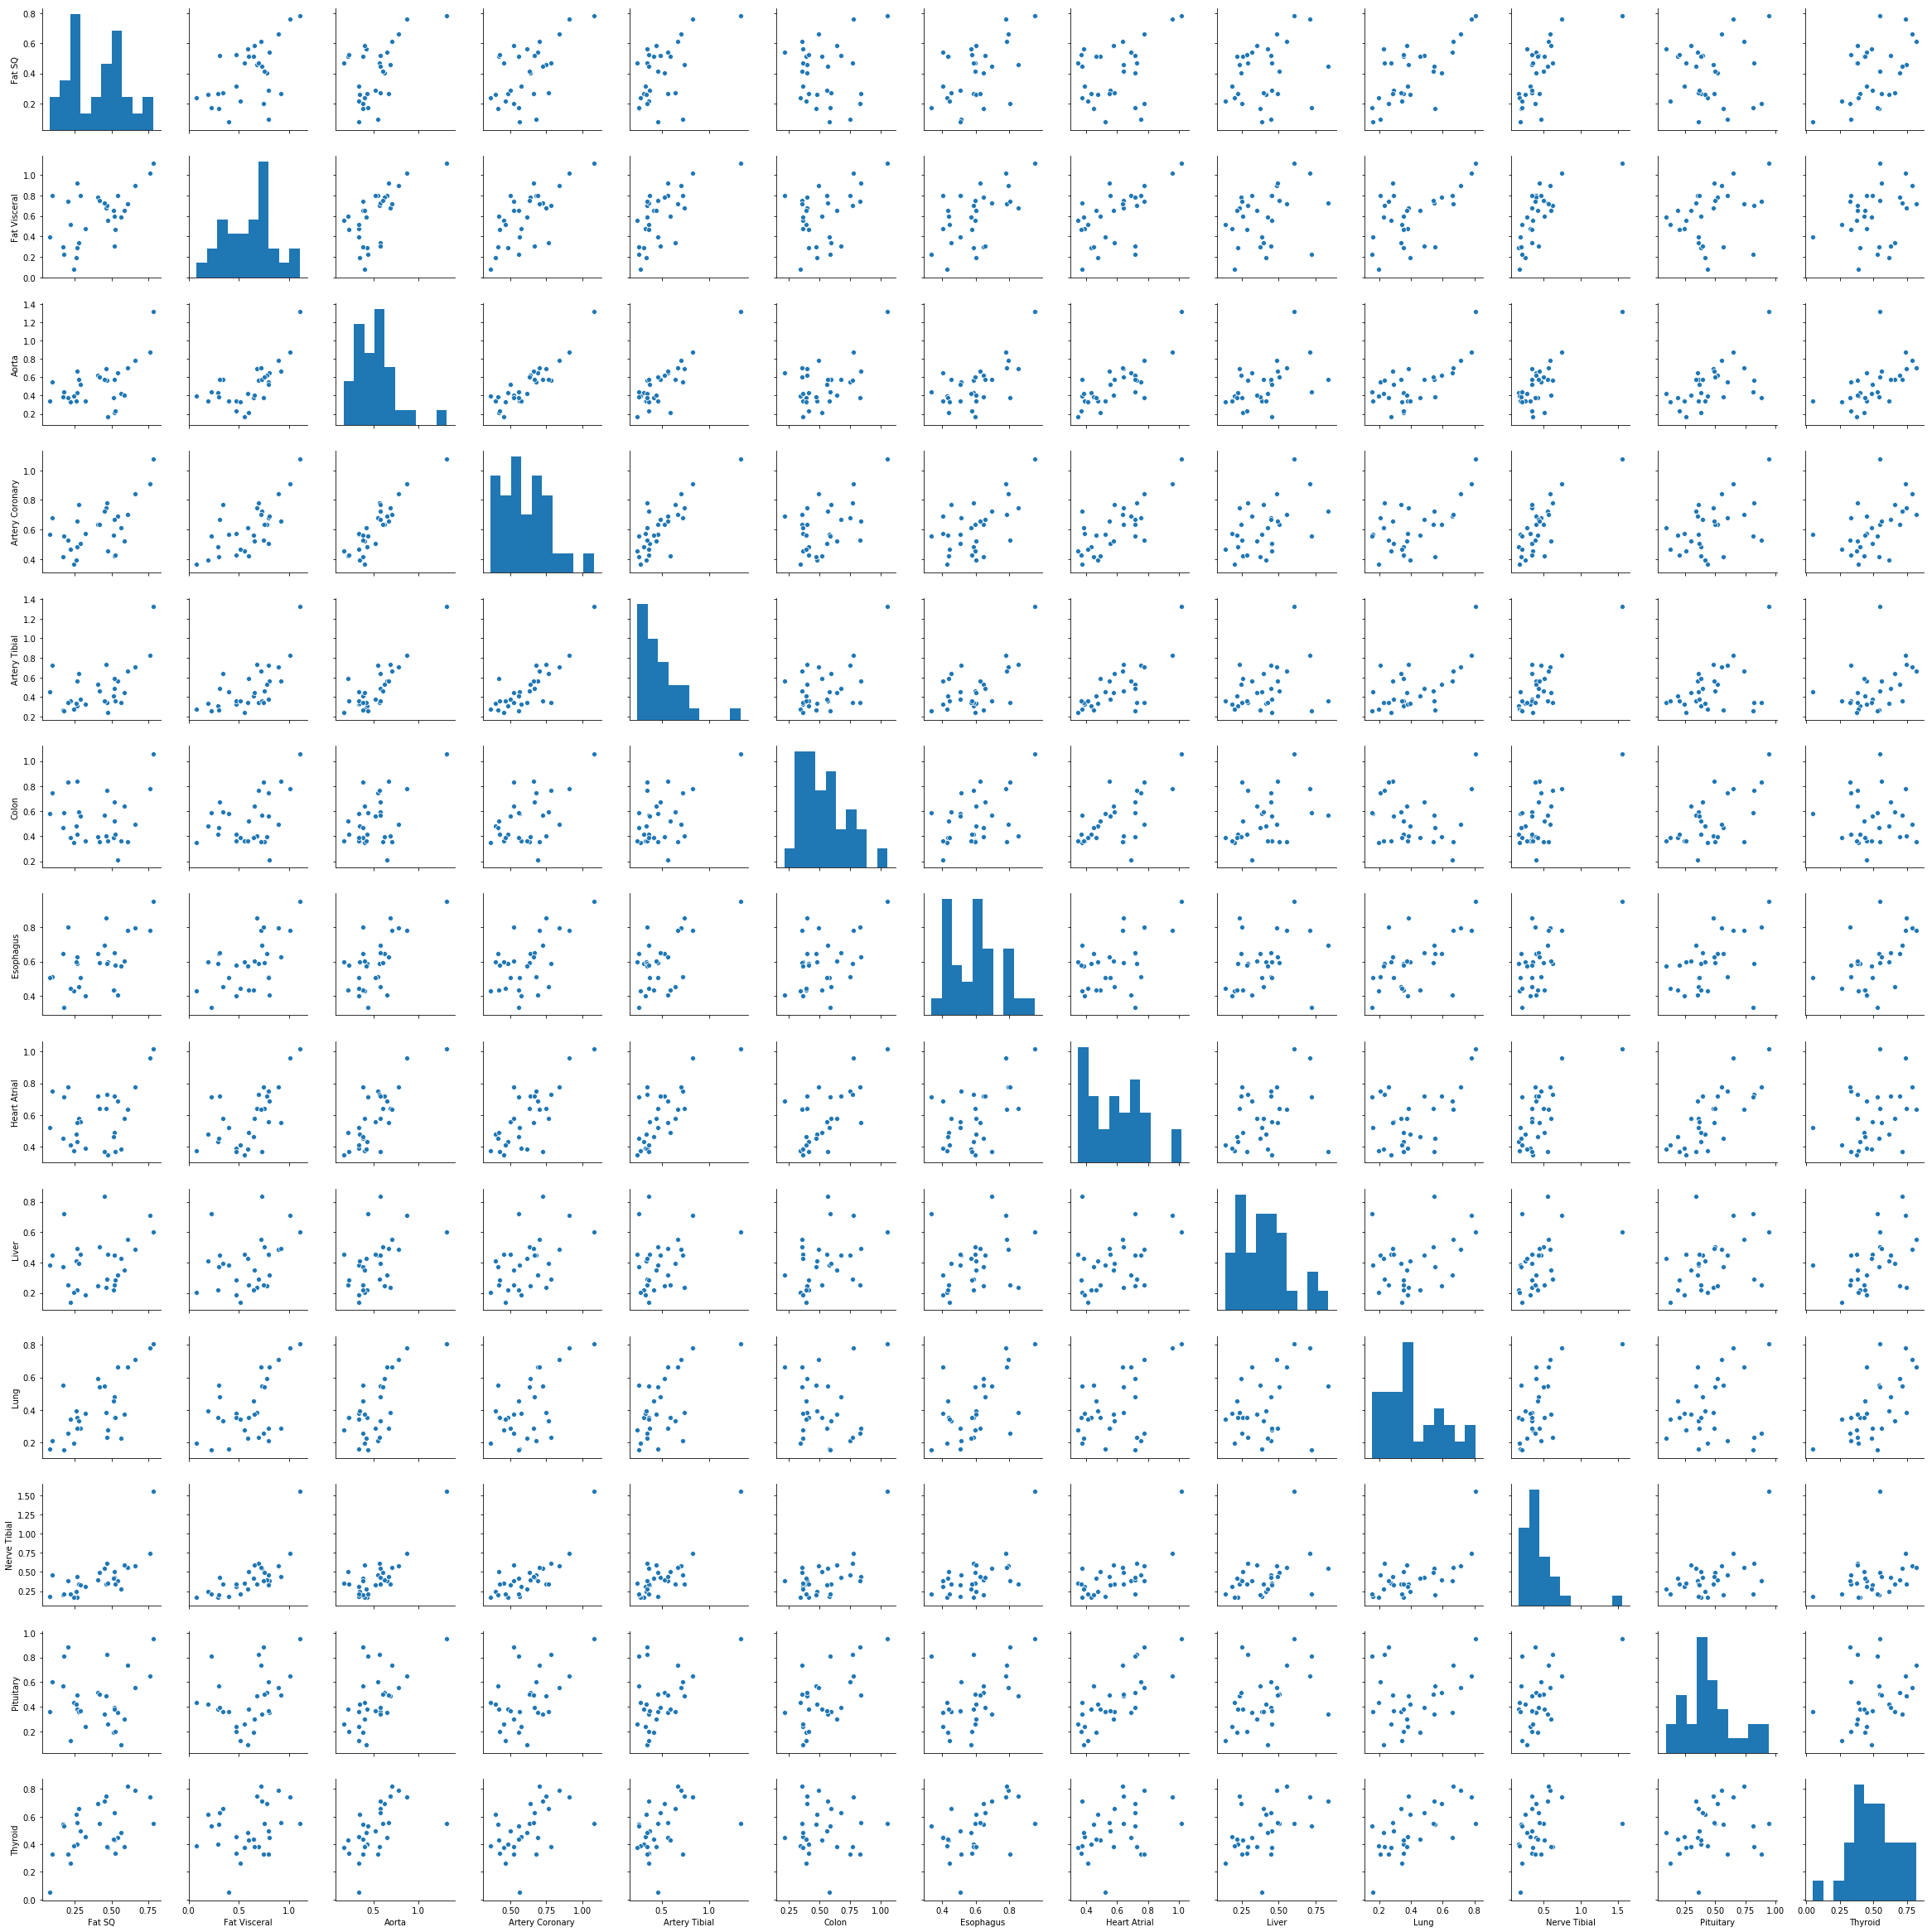

In [83]:
plt.figure(figsize = (tissue_len*6,tissue_len*6))
g = sns.pairplot(gene_fdr_list)
plt.tight_layout()
plt.savefig('plot/circa_db_fdr_compare.pdf')

plt.figure(figsize = (tissue_len*6,tissue_len*6))
g = sns.pairplot(gene_amp_list)
plt.tight_layout()
plt.savefig('plot/circa_db_amp_compare.pdf')

In [6]:
unique_genes = set(circa_db.loc[:,'Entrez.ID'])

fdr_cv = []
amp_cv = []

for gene in unique_genes:
    gene_id = circa_db.index[circa_db['Entrez.ID'] == gene]
    gene_fdr = circa_db.iloc[gene_id,4]
    gene_fdr_cv = gene_fdr.std()/gene_fdr.mean()
    fdr_cv.append(gene_fdr_cv)
    
    gene_amp = circa_db.iloc[gene_id,6]
    gene_amp_cv = gene_amp.std()/gene_amp.mean()
    amp_cv.append(gene_amp_cv)
fdr_cv = np.array(fdr_cv)
amp_cv = np.array(amp_cv)

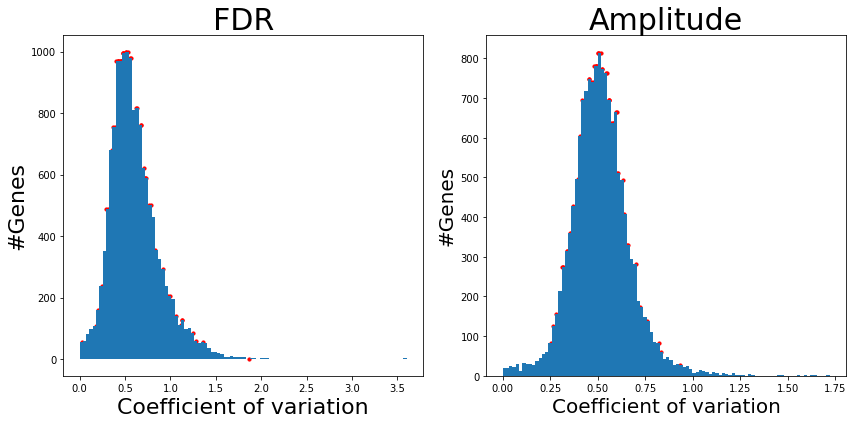

In [7]:
unique_genes_list = list(unique_genes)
circa_drug_tar_id = []
for tar in circa_drug_tar:
    if tar in unique_genes_list:
        tar_id = unique_genes_list.index(tar)
        circa_drug_tar_id.append(tar_id)
 
plt.figure(figsize = (12,6))
ax = plt.subplot(1, 2, 1)
axh = ax.hist(fdr_cv[~np.isnan(fdr_cv)], bins = 100)

circa_drug_tar_fdr_cv = fdr_cv[circa_drug_tar_id]
circa_drug_tar_fdr_cv = circa_drug_tar_fdr_cv[~np.isnan(circa_drug_tar_fdr_cv)]
circa_drug_tar_fdr_cv_freq = find_value_bin_frequency(circa_drug_tar_fdr_cv,axh)
ax.scatter(circa_drug_tar_fdr_cv, circa_drug_tar_fdr_cv_freq, color = 'red', s = 10)

ax.set_title('FDR', size = 30)
ax.set_xlabel('Coefficient of variation', size = 22)
ax.set_ylabel('#Genes', size= 22)

ax = plt.subplot(1, 2, 2)
axh = ax.hist(amp_cv[~np.isnan(amp_cv)], bins = 100)

circa_drug_tar_amp_cv = amp_cv[circa_drug_tar_id]
circa_drug_tar_amp_cv = circa_drug_tar_amp_cv[~np.isnan(circa_drug_tar_amp_cv)]
circa_drug_tar_amp_cv_freq = find_value_bin_frequency(circa_drug_tar_amp_cv,axh)
ax.scatter(circa_drug_tar_amp_cv, circa_drug_tar_amp_cv_freq, color = 'red', s = 10)
    
ax.set_title('Amplitude', size = 30)
ax.set_xlabel('Coefficient of variation', size = 20)
ax.set_ylabel('#Genes', size= 20)

plt.tight_layout()
plt.savefig('plot/circa_db_gene_scores.pdf')

In [15]:
circa_db = pd.read_csv('data/circa_db_mapped.tsv', sep = '\t')

In [24]:
circa_db_sub = circa_db.sample(n = 1000, axis = 0)

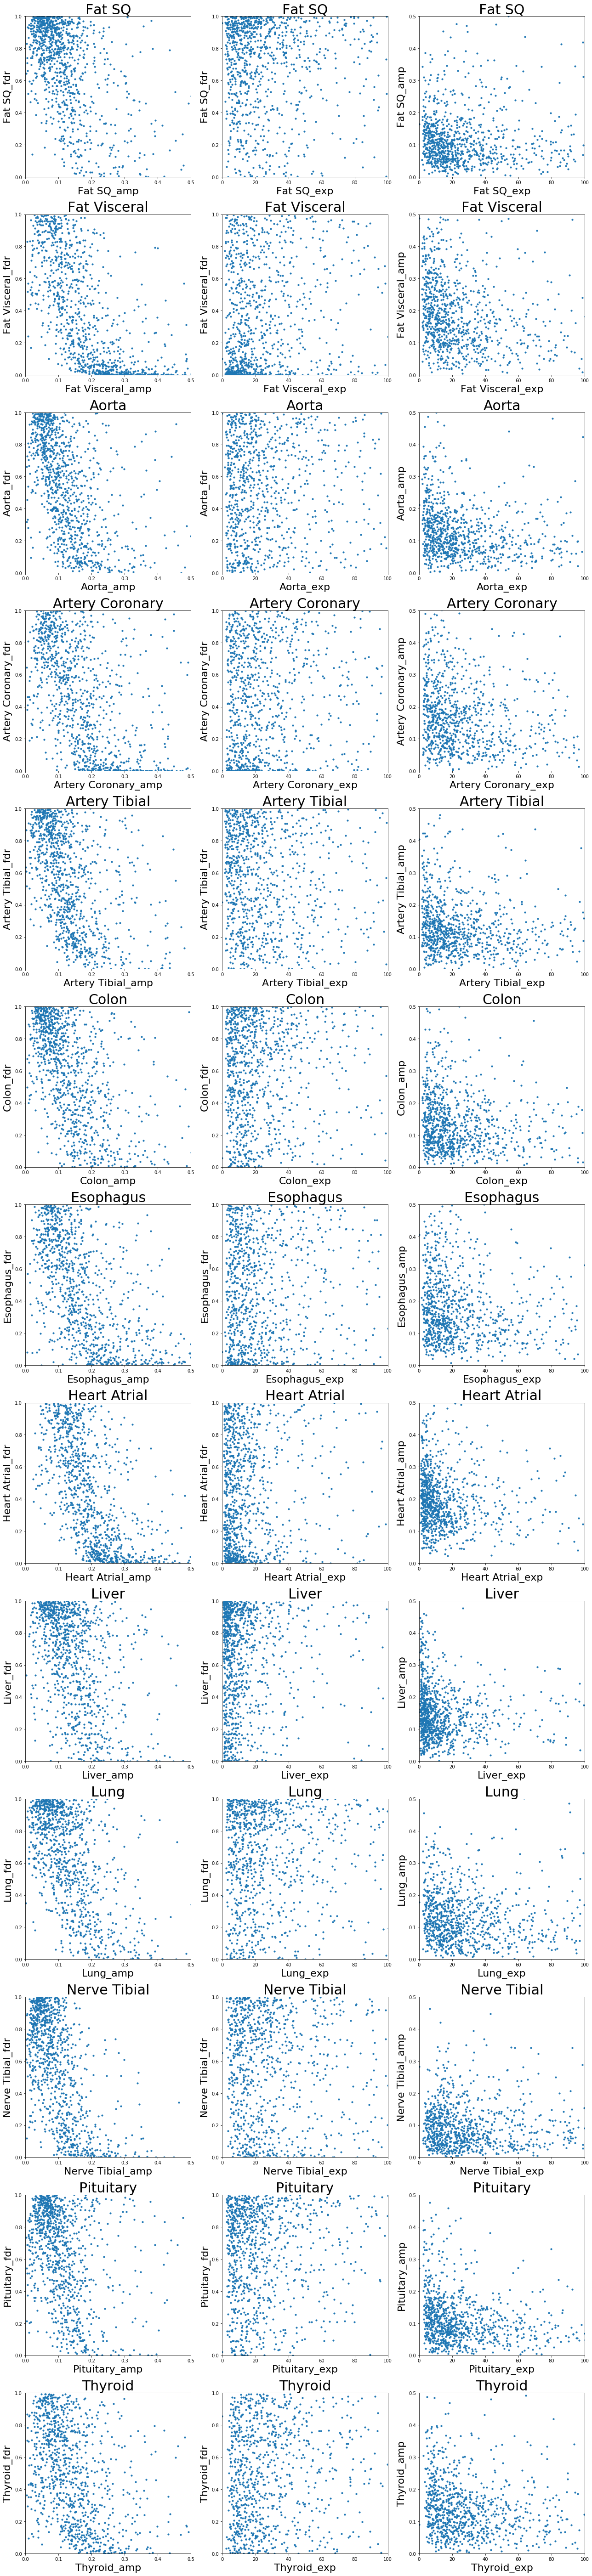

In [25]:
plt.figure(figsize = (18,78))

for i in range(0,13):
    tissue_type = circa_db_sub.columns[i+1].split('_')[0]
    ax = plt.subplot(13, 3, i*3+1)
    
    ax.scatter(circa_db_sub.iloc[:,i+14], circa_db_sub.iloc[:,i+1], s = 10)
    plt.xlim(0,0.5)
    plt.ylim(0,1)
    ax.set_title(tissue_type, size = 30)
    ax.set_xlabel(circa_db_sub.columns[i+14], size = 22)
    ax.set_ylabel(circa_db_sub.columns[i+1], size= 22)
    
    ax = plt.subplot(13, 3, i*3+2)
    ax.scatter(circa_db_sub.iloc[:,i+27], circa_db_sub.iloc[:,i+1], s = 10)
    plt.xlim(0,100)
    plt.ylim(0,1)
    ax.set_title(tissue_type, size = 30)
    ax.set_xlabel(circa_db_sub.columns[i+27], size = 22)
    ax.set_ylabel(circa_db_sub.columns[i+1], size= 22)
    
    ax = plt.subplot(13, 3, i*3+3)
    ax.scatter(circa_db_sub.iloc[:,i+27], circa_db_sub.iloc[:,i+14], s = 10)
    plt.xlim(0,100)
    plt.ylim(0,0.5)
    ax.set_title(tissue_type, size = 30)
    ax.set_xlabel(circa_db_sub.columns[i+27], size = 22)
    ax.set_ylabel(circa_db_sub.columns[i+14], size= 22)

plt.tight_layout()
plt.savefig('plot/circa_db_mapped_compare.pdf')